In [1]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
from statsmodels.formula.api import ols #for n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm #For n-way ANOVA
from scipy.stats import t
from   scipy.stats import ttest_1samp, ttest_ind
import scipy.stats as stats
import statsmodels.stats.api as sm
import warnings
warnings.filterwarnings("ignore")

#Problem 1:
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)
#Problem 1.1
 What proportion of the gunny bags have a breaking strength less than 3.17kg per sq. cm?

* From the given question we can see the population mean (mu) = 5 kg/cm2
* Population standard deviation (Sigma) = 1.5 kg/cm2
* By using mean and standard deviation we can find the lower and upper limits of the given problem, we can use them while visualising.
* 99.7% of the data lies with 3 standard deviations of the mean.
* So the lower limit = 3* sigma – mu
		       = (3 * 1.5) – 5
		       = - 0.5
          Upper limit = 3* sigma + mu
		      = (3*1.5) + 5
		      = 9.5


In [ ]:
test_stat=round(stats.norm.cdf(3.17,loc=5,scale=1.5),4)
print(
    "The proportion of gunny bags having breaking strength less than 3.17 is" , test_stat
)

The proportion of gunny bags having breaking strength less than 3.17 is 0.1112


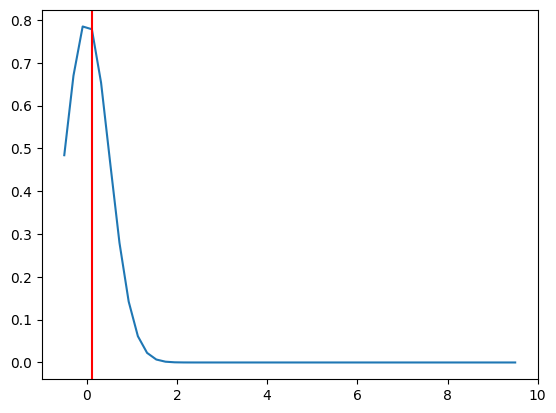

In [ ]:
from scipy.stats import norm
x=np.linspace(-0.5,9.5,50)
plt.plot(x,norm.pdf(x,0,0.5))
plt.axvline(x=test_stat,c="r")
x1=np.linspace(test_stat,4,10)
plt.show()

#Problem 1.2
What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

In [ ]:
test=1-round(stats.norm.cdf(3.6,loc=5,scale=1.5),4)
print(
    "The proportion of gunny bags having breaking strength atleast 3.6 is" , test
)

The proportion of gunny bags having breaking strength atleast 3.6 is 0.8247


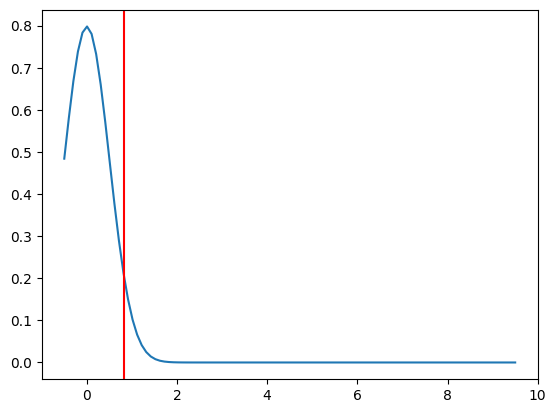

In [ ]:
from scipy.stats import norm
x=np.linspace(-0.5,9.5,100)
plt.plot(x,norm.pdf(x,0,0.5))
plt.axvline(x=test,c="r")
x1=np.linspace(test,4,10)
plt.show()

#Problem 1.3
What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [ ]:
test1=round(stats.norm.cdf(5.5,loc=5,scale=1.5)-stats.norm.cdf(5,loc=5,scale=1.5),4)
print(
    "The proportion of gunny bags having breaking strength between 5 and 5.5 is" , test1
)

The proportion of gunny bags having breaking strength between 5 and 5.5 is 0.1306


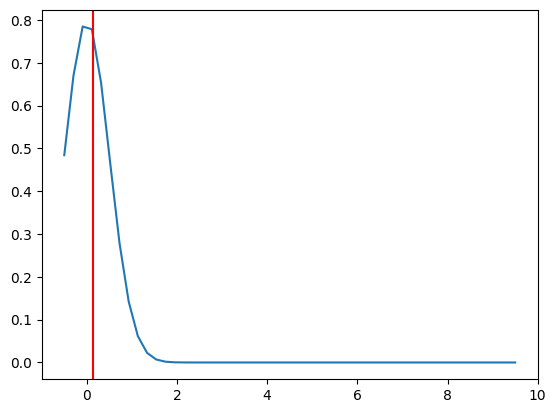

In [ ]:
from scipy.stats import norm
x=np.linspace(-0.5,9.5,50)
plt.plot(x,norm.pdf(x,0,0.5))
plt.axvline(x=test1,c="r")
plt.show()

#Problem 1.4
What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [ ]:
test2=1-(round(stats.norm.cdf(7.5,loc=5,scale=1.5)-stats.norm.cdf(3,loc=5,scale=1.5),4))
print(
    "The proportion of gunny bags having breaking strength not between 3 and 7.5 is" , test2
)

The proportion of gunny bags having breaking strength not between 3 and 7.5 is 0.139


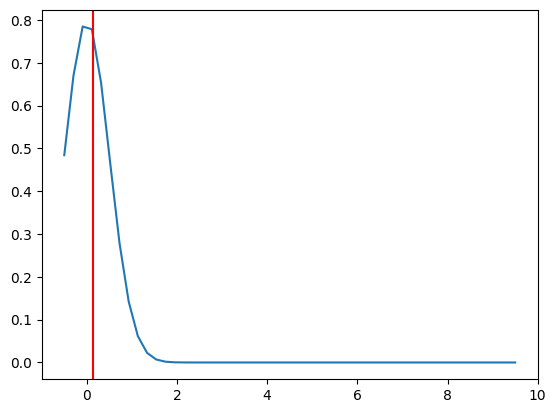

In [ ]:
from scipy.stats import norm
x=np.linspace(-0.5,9.5,50)
plt.plot(x,norm.pdf(x,0,0.5))
plt.axvline(x=test2,c="r")
plt.show()

#Problem 2
Grades of the final examination in a training course are found to be normally distributed, with a mean of 77 and a standard deviation of 8.5. Based on the given information answer the questions below.

#Problem 2.1
What is the probability that a randomly chosen student gets a grade below 85 on this exam?

The probability of student getting grade below 85 can be calculated using mean and standard deviation in the problem using normal cumulative distribution function in statistics.

In [ ]:
round(stats.norm.cdf(85,loc=77,scale=8.5),4)

0.8267

There is a probability of 82.67% chance that a randomly chosen student gets a grade below 85 in the exam.

#Problem 2.2
 What is the probability that a randomly selected student scores between 65 and 87?

* The probability of student scoring between 65 and 87 can be calculated using mean, standard deviation values and normal cumulative distribution function in statistics.

In [ ]:
round(stats.norm.cdf(87,loc=77,scale=8.5)-stats.norm.cdf(65,loc=77,scale=8.5),4)

0.8013

By using the above stated method i.e., cumulative distribution function, there is probability of 80.13% chance that a randomly selected student scores between 65 and 87.

#Problem 2.3
 What should be the passing cut-off so that 75% of the students clear the exam?
* The passing cut-off marks that students need to make, so that 75% of the students clear the exam is calculated by using Per cent Point function in statistics.

In [ ]:
round(stats.norm.ppf(0.25,loc=77,scale=8.5),4)

71.2668

The marks that are needed to be score by the students so that 75% of the students clear the exam are 71.26 marks.

#Problem 3:
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/Zingaro_Company.csv")
df=pd.read_csv(path)

In [ ]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


From the above information we can see that the data has only float data types and there are no null values in the data set.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


* The above table describes the nature of the 2 variables in the data set, which are Unpolished, Treated and Polished.
* From the above table we can see the mean hardness of given sample of unpolished stone is 134.11, maximum hardness is 200.13 and minimum hardness is 48.40 and it has a standard deviation of 33.04.
* The mean hardness of given sample of Treated and polished stones is 147.7, maximum hardness is 192.27 and minimum hardness is 107.52 and the standard deviation of given sample of stones is 15.58.
* From the given problem that the hardness of the stones must be atleast 150, we can consider it has the mean of the population.


<Axes: xlabel='Unpolished'>

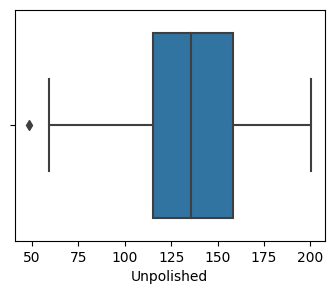

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df,x="Unpolished")

<Axes: xlabel='Treated and Polished'>

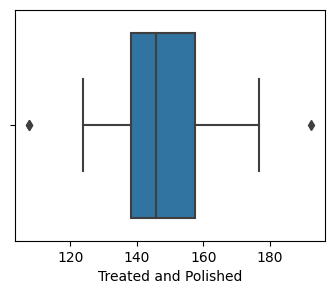

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df,x="Treated and Polished")

#Problem 3.1
 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

* From the data set we can calculate the mean and standard deviation of the given sample, which are used for calculating the t-statistic and p-value.
* But first we have to state the null and alternated hypothesis before proceeding further.
* According to the problem statement, Zingaro Company thinks that the unpolished stones may not be suitable for printing as they don’t have adequate hardness.
* So,
We can state null hypothesis (H0) and alternate hypothesis (H1) as

* H0: Hardness is greater than or equal to 150



* H1: Hardness is less than 150

* Level of significance = alpha=0.05

In [ ]:
mu=150
x_bar=df["Unpolished"].mean()
sigma=df["Unpolished"].std()
print("the estimated mean value of Unpolished stones is", round(x_bar,2))
print("The estimated standard deviation of unpolishes stones is", round(sigma,2))

the estimated mean value of Unpolished stones is 134.11
The estimated standard deviation of unpolishes stones is 33.04


In [ ]:
t_statistic,p_value=ttest_1samp(df["Unpolished"],150)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

One sample t test 
t statistic: -4.164629601426757 p value: 8.342573994839304e-05 
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


* Here the P- value is less than the alpha(0.05), so we have enough evidence to reject the null hypothesis in favour of alternate hypothesis at 95% confidence interval, at which the adequate hardness of unpolished stones are not suitable for printing.
* So, we can justify Zingaro company in thinking that unpolished stones are not suitable for printing.


#Problem 3.2
Is the mean hardness of the polished and unpolished stones the same?

* From the data set we can calculate the mean and standard deviation of the given samples of treated and polished and unpolished stones, which are used for calculating the t-statistic and p-value.
* But first we have to state the null and alternated hypothesis before proceeding further.
* So,
We can state null hypothesis (H0) and alternate hypothesis (H1) as

* H0: Mean hardness of unpolished and polished stones are equal
* H1 mean hardness of unpolished and polished stones are not equal

In [ ]:
t_statistic, p_value= ttest_ind(df["Unpolished"],df["Treated and Polished"])
print("tstat",t_statistic)
print("P value", p_value)

tstat -3.2422320501414053
P value 0.0014655150194628353


In [ ]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

two-sample t-test p-value= 0.0014655150194628353
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


Here,
The P- value obtained is less than the alpha (0.05), so we have enough evidence to reject the null hypothesis in favour of alternate hypothesis at 95% confidence interval, which means the mean hardness of the unpolished stones is not equal to the mean hardness of polished stones.


#Problem 4
Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)

Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.

In [4]:
path=("/content/drive/MyDrive/Aquarius_gym.csv")
data=pd.read_csv(path)

In [5]:
data.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


There are 3 columns and 100 rows in the data set, 2 variables are important for performing the hypothesis test that are before and after are the number of pushups done by the candidate in the training.
The level of significance given = alpha = 0.05


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sr no.  100 non-null    int64
 1   Before  100 non-null    int64
 2   After   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


Above table is the table which contains basic information of the data set.
It consists of integer data types and there are no null values in the data set, so it doesn’t require any imputations for further process.


<Axes: xlabel='Before'>

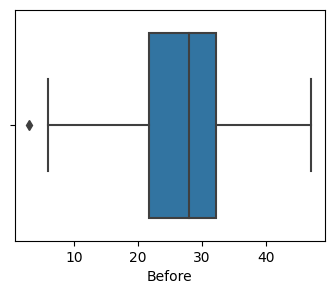

In [7]:
plt.figure(figsize=(4,3))
sns.boxplot(data=data,x="Before")

<Axes: xlabel='After'>

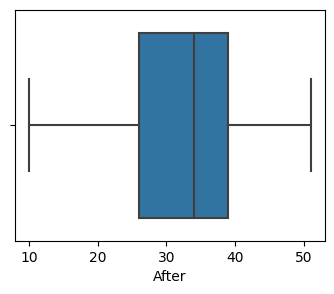

In [8]:
plt.figure(figsize=(4,3))
sns.boxplot(data=data,x="After")

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr no.,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Before,100.0,26.94,8.806357,3.0,21.75,28.0,32.25,47.0
After,100.0,32.49,8.779562,10.0,26.00,34.0,39.00,51.0


* We can see the mean, minimum, maximum and standard deviation of the variables in the data set, which are as follows:
* Minimum number of pushups in Before variable are 3, maximum are 47, mean push ups are 26.94 and standard deviation for the same is 8.806
* The same for the After variable in the data set are 10 (minimum), 51 (maximum), 32.49 (mean) and 8.77 (standard deviation).
* Before we proceed further we need to state null (H0) and alternate hypothesis (H1) for testing of the same.


* H0: Mean number of pushups being done after training (a) is less than the mean number of pushups being done before the training (b) a-b<=5

* H1: Mean number of pushups done after the training is greater than the mean number of pushups done before the training a-b>5


* level of significance alpha=0.05

In [10]:
data["Difference"]=data["After"]-data["Before"]
data.head()

,Sr no.,Before,After,Difference
0,1,39,44,5
1,2,25,25,0
2,3,39,39,0
3,4,6,13,7
4,5,40,44,4


Considering the difference column we can reformulate the hypothesis in terms of difference.
* H0: mean number of difference of puspups done is less than or equal to 5
* H1: mean number of differece of pushups done is greater than 5

In [13]:
t_statistic, p_value  =  stats.ttest_rel(data["Before"],data["After"])
print('tstat  %1.3f' % t_statistic)
print("p-value for one-tail:", p_value/2)

tstat  -19.323
p-value for one-tail: 1.1460209626255983e-35


In [14]:
print ("Paired two-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

Paired two-sample t-test p-value= 1.1460209626255983e-35
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


Here, p-value we obtained after performing paired 2 sample t test is less than alpha (0.05), we can reject the hypothesis in favour of alternate hypothesis at 95% confidence interval.

# Problem 5
Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

In [5]:
path=("/content/drive/MyDrive/Dental Hardness data.xlsx")
data=pd.read_excel(path,"Data")

In [16]:
data.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [17]:
data.shape

(90, 5)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


* In the above data set, we have 5 columns which are all integer data types and has no null values.
* The variables Dentist, Method, Alloy, Temp have to be converted to categorical variables for further proceeding of the testing.
* These can be converted using pandas library as pd.Categorical.


In [6]:
data.Alloy=pd.Categorical(data.Alloy)
data.Temp=pd.Categorical(data.Temp)
data.Method=pd.Categorical(data.Method)
data.Dentist=pd.Categorical(data.Dentist)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


* Above table is after conversion of interger data type to Categorical data types.
* In this data set, in alloy variable there are 2 types of Alloys.


In [7]:
df1=data.loc[data["Alloy"]==1]
df2=data.loc[data["Alloy"]==2]

In [22]:
df1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
6,1,2,1,1500,782
7,1,2,1,1600,698


In [23]:
df2.head()

,Dentist,Method,Alloy,Temp,Response
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
9,1,2,2,1500,1115
10,1,2,2,1600,835


* Data set has be divided into 2 sub sets based on the type of Alloy to further process in the testing as alloys of both types has to be tested separately.
* Two subsets are df1 and df2, both has 5 variables and 45 rows.


In [24]:
df1.shape

(45, 5)

In [25]:
df2.shape

(45, 5)

In [26]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Response,45.0,707.488889,121.194551,289.0,681.0,743.0,782.0,882.0


In [27]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Response,45.0,776.066667,160.892595,312.0,715.0,824.0,858.0,1115.0


#Problem 5.1
Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys.?


#For Alloy1:

* By using ANOVA technique, we can test whether there is any difference among the dentists on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable and Dentist, we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:

* H0: Mean hardness is equal among all the dentists for type 1 alloy
* H1 : Mean hardness is not equal for atleast one the dentists for type 1 alloy

In [28]:
formula = 'Response ~ C(Dentist)'
model=ols(formula,df1).fit()
aov_table=anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [29]:
p_value= 0.116567
alpha = 0.05
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis


* From the above ANOVA table we can see the value of P – value is 0.116567.

* Here, p-value is greater than the alpha value, we do not have enough evidence to reject null hypothesis in favour of alternative hypothesis i.e., we failed to reject null hypothesis.


#For Alloy2:

* By using ANOVA technique, we can test whether there is any difference among the dentists on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable and Dentist, we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:


H0: Mean hardness is equal among all the dentists for type 2 alloy

H1: Mean hardness is not equal for at least one of the dentists for type 2 alloy


In [30]:
formula = 'Response ~ C(Dentist)'
model=ols(formula,df2).fit()
aov_table=anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [31]:
p_value= 0.718031
alpha = 0.05
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis


* From the above ANOVA table we can see the value of P – value is 0.718031

* Here, p-value is greater than the alpha value, we do not have enough evidence to reject null hypothesis in favour of alternative hypothesis i.e., we failed to reject null hypothesis.


#Problem 5.2
Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on both alloy types.?

<Axes: xlabel='Response'>

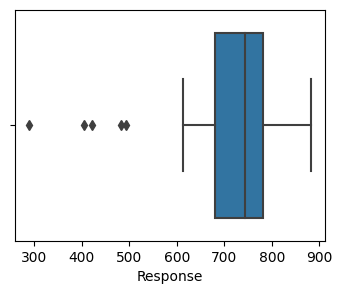

In [40]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df1,x="Response")

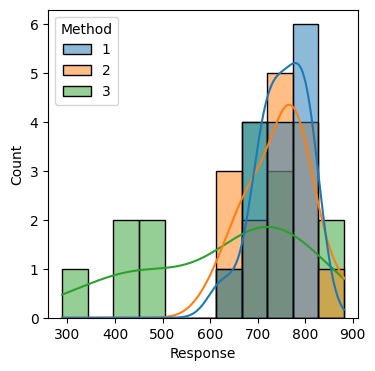

In [41]:
plt.figure(figsize=(4,4))
sns.histplot(data=df1,x="Response",hue="Method",kde=True);

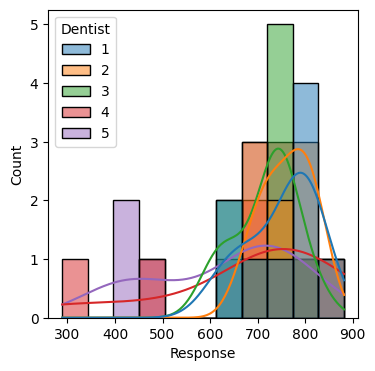

In [42]:
plt.figure(figsize=(4,4))
sns.histplot(data=df1,x="Response",hue="Dentist",kde=True);

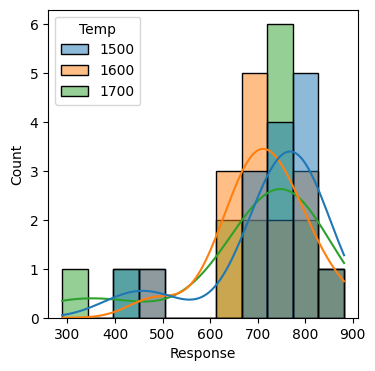

In [43]:
plt.figure(figsize=(4,4))
sns.histplot(data=df1,x="Response",hue="Temp",kde=True);

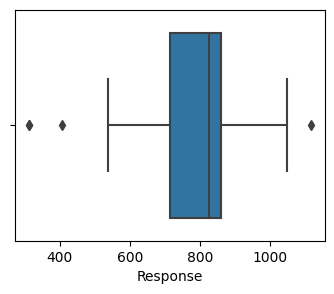

In [44]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df2,x="Response");

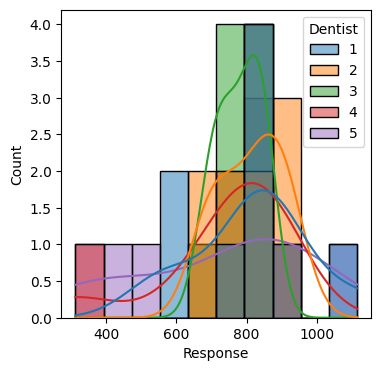

In [45]:
plt.figure(figsize=(4,4))
sns.histplot(data=df2,x="Response",hue="Dentist",kde=True);

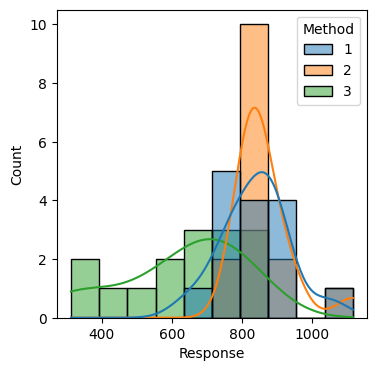

In [46]:
plt.figure(figsize=(4,4))
sns.histplot(data=df2,x="Response",hue="Method",kde=True);

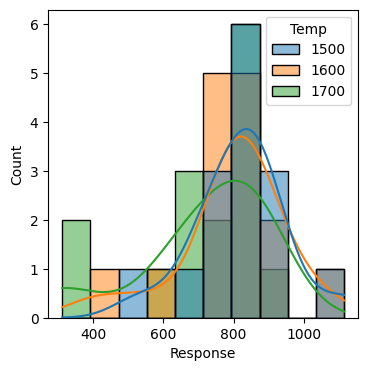

In [47]:
plt.figure(figsize=(4,4))
sns.histplot(data=df2,x="Response",hue="Temp",kde=True);

#Required assumptions for Hypothesis testing:

1.	Dependent variable should be measured at the continuous level.

2.	Two independent variables should each consists of 2 or more categorical independent groups.


3.	There should be no significant outliers.

4.	Dependent variable should be approximately normally distributed for each combination of the groups of the two independent variables.


* Some of the assumptions are not fulfilled; here the given data Dependent variable isn’t measured at the continuous levels.

* The assumption of having 2 or more categorical independent groups is fulfilled.

* There are outliers in the data in the response variable.
* Dependent variable is not normally distributed among the groups of the variables.

#Problem 5.3
 Irrespective of your conclusion in 7.2, we will continue with the testing procedure. What do you conclude regarding whether implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to identify which pairs of dentists differ?

* H0: Mean hardness is same across different dentists with type 1 alloy
* H1: Mean hardness is different for atleast one pair of dentists with type 1 alloy

In [50]:
formula = 'Response ~ C(Dentist)'
model1=ols(formula,df1).fit()
aov_table1=anova_lm(model1)
print(aov_table1)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


Since p - value is 0.11 which is greater than 0.05, we fail to reject the null hypothesis.

* H0: Mean hardness is same across different dentists with type 2 alloy
* H1: Mean hardness is different for atleast one pair of dentists with type 2 alloy

In [51]:
formula = 'Response ~ C(Dentist)'
model2=ols(formula,df2).fit()
aov_table2=anova_lm(model2)
print(aov_table2)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


Since, p-value is 0.71 which is greater than 0.05, we failed to reject the null hypothesis.


#Problem 5.4
Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?

#For Alloy1:

* By using ANOVA technique, we can test whether there is any difference among the methods on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable and Method, we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:

* H0: Mean hardness is equal among all the methods for type 1 alloy

* H1: Mean hardness is not equal for at least one of the methods for type 1 alloy


In [ ]:
formula = 'Response ~ C(Method)'
model=ols(formula,df1).fit()
aov_table=anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [ ]:
p_value= 0.004163
alpha = 0.05
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


Here, p-value is less than the alpha value; we can reject the null hypothesis in favour of alternative hypothesis at 95% confidence interval and conclude that the mean hardness is not equal for at least one methods of the impantation for Alloy 1.

#For Alloy2:

* By using ANOVA technique, we can test whether there is any difference among the methods on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable and Method, we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:
* H0: Mean hardness is equal among all the methods for type 2 alloy

* H1: Mean hardness is not equal for at least one of the methods for type 2 alloy


In [ ]:
formula = 'Response ~ C(Method)'
model=ols(formula,df2).fit()
aov_table=anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [ ]:
p_value= 0.000005
alpha = 0.05
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


* From the above table, we can see that the value of p is 0.000005, which is less than the alpha value; we can reject the null hypothesis in favour of alternate hypothesis at 95% confidence interval.
* Mean hardness is not equal for atleast one of the Methods of dental implantation.

* Yes, it is possible to identify the pair of methods which defers.


#Problem 5.5
Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?

#For Alloy1:

* By using ANOVA technique, we can test whether there is any difference among the temperatures on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable and Temperature, we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:

* H0: Mean hardness is equal among temperatures with type 1 alloy

* H1: Mean hardness is not equal for at least one of the Temperatures with type 1 alloy.


In [ ]:
formula = 'Response ~ C(Temp)'
model=ols(formula,df1).fit()
aov_table=anova_lm(model)
print(aov_table)

            df         sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0   10154.444444   5077.222222  0.335224  0.717074
Residual  42.0  636122.800000  15145.780952       NaN       NaN


In [ ]:
p_value= 0.717074
alpha = 0.05
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis


* From the above ANOVA table, we see that the p-value is 0.717074 which is greater than the alpha value (0.05).
* Since p-value is greater than 0.05, we do not have enough evidence to reject null hypothesis in favour of alternate hypothesis.


#For Alloy2:

* By using ANOVA technique, we can test whether there is any difference among the Temperatures on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable and Temperature, we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:

* H0: Mean hardness is equal among the Temperatures with type 2 alloy.

* H1: Mean hardness is not equal for at least one of the Temperatures with type 2 alloy.


In [ ]:
formula = 'Response ~ C(Temp)'
model=ols(formula,df2).fit()
aov_table=anova_lm(model)
print(aov_table)

            df        sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0  9.374893e+04  46874.466667  1.883492  0.164678
Residual  42.0  1.045254e+06  24886.996825       NaN       NaN


In [ ]:
p_value= 0.164678
alpha = 0.05
if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis


* From the above table, we can see the value of p is 0.164678.
Here, the p-value is greater than the value of alpha (0.05), we cannot reject the null hypothesis as we do not enough evidence at 95% confidence interval in favour of alternate hypothesis.




#Problem 5.6
Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?


In [8]:
def detect_outlier(col):
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range, upper_range

In [9]:
lr,ur=detect_outlier(df1["Response"])
print("lower range",lr, "upper range",ur)

lower range 529.5 upper range 933.5


In [10]:
df1["Response"]=np.where(df1["Response"]>ur,ur,df1["Response"])
df1["Response"]=np.where(df1["Response"]<lr,lr,df1["Response"])

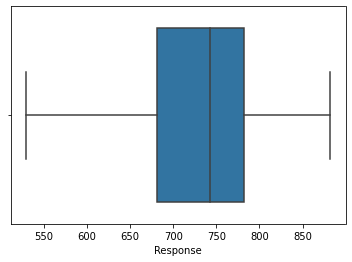

In [ ]:
sns.boxplot(data=df1,x="Response")

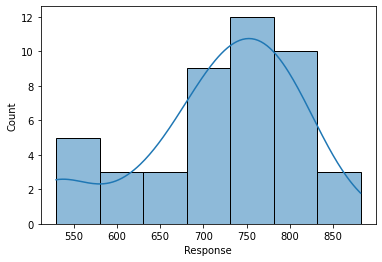

In [ ]:
sns.histplot(data=df1,x="Response",kde=True)

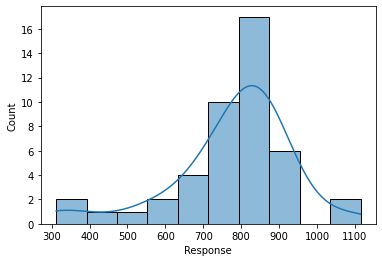

In [ ]:
sns.histplot(data=df2,x="Response",kde=True)

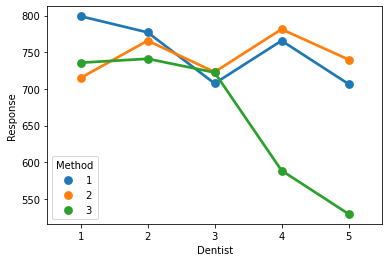

In [ ]:
sns.pointplot(data=df1,x="Dentist",y="Response",hue="Method",ci=None)

There is interaction between all 3 methods of dental implantation.

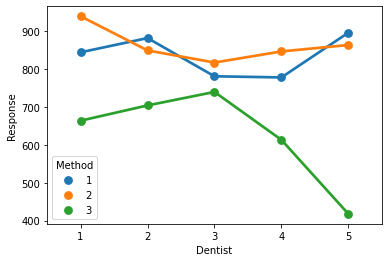

In [ ]:
sns.pointplot(data=df2,x="Dentist",y="Response",hue="Method",ci=None)

There is interaction between only 2 types of Methods.

#Problem 5.7
Now consider the effect of factors, dentist, and method, separately on each alloy. What do you conclude? Is it possible to identify which dentists are different, which methods are different, and which interaction levels are different?


#Anova table for alloy1:

* By using ANOVA technique, we can test whether there is any difference among the Method and Dentist on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable, Dentist and Method we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:

** H0: Mean hardness is equal among the Methods.
*      Mean hardness is equal among the Dentists
*      There is no interaction between Method and Dentist

**  H1: Mean hardness is not equal for at least one of the Methods.
*      Mean hardness is not equal for at least one of the Dentists.
*     There is an interaction between Method and Dentists.



In [ ]:
formula = 'Response ~ C(Dentist) + C(Method)'
model=ols(formula,df1).fit()
aov_table=anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0   57773.200000  14443.300000  2.461157  0.061673
C(Method)    2.0   71910.144444  35955.072222  6.126792  0.004940
Residual    38.0  223002.966667   5868.499123       NaN       NaN


* From the above we can see the value of P for Dentist is 0.061473 which is greater than alpha value, we cannot reject the null hypothesis as we don’t have enough evidence.
* For Method, the P-value is 0.004940 which is less than alpha value, we can reject null hypothesis.
* There is interaction between Method and Dentist.



#Anova table for alloy2:

* By using ANOVA technique, we can test whether there is any difference among the Method and Dentist on the implant hardness.
* Let’s consider level of significance (alpha) = 0.05

* By using ANOVA table with Response variable, Dentist and Method we can calculate p-value

* For further proceeding, we have to null (H0) and alternate hypothesis (H1) as follows:

** H0: Mean hardness is equal among the Methods.
*     Mean hardness is equal among the Dentists
*     There is no interaction between Method and Dentist

** H1: Mean hardness is not equal for at least one of the Methods.
*      Mean hardness is not equal for at least one of the Dentists.
*     There is an interaction between Method and Dentists.


In [ ]:
formula = 'Response ~ C(Dentist) + C(Method)'
model=ols(formula,df2).fit()
aov_table=anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


* From the above we can see the value of P for Dentist is 0.458933, which is greater than alpha value, we cannot reject the null hypothesis as we don’t have enough evidence.
* For Method, the P-value is 0.000008 which is less than alpha value, we can reject null hypothesis.
* There is interaction between Method and Dentist.
